# Simulated annealing

Mediante esta técnica de búsqueda heurística intentaremos aproximarnos al mínimo de la siguiente función:

$$
f(x,y) = 0.2 + x^2 + y^2 - 0.1 \cdot \cos(6 \pi x) - 0.1 \cdot \cos(6 \pi y)
$$

<img src="imgs/function_min.jpg" width=70%>

Su mínimo se encuentra en el punto $(0,0)$.

iteration Number =  0   best_so_far =  [-8.3506167  21.92515248]   new_best = 550.53550
SALTO
iteration Number =  1   best_so_far =  [-8.26407594 21.69499861]   new_best = 539.05545
SALTO
iteration Number =  2   best_so_far =  [-8.08959477 21.61887792]   new_best = 532.96760
SALTO
iteration Number =  3   best_so_far =  [-8.05769086 21.59394088]   new_best = 531.35911
SALTO
iteration Number =  4   best_so_far =  [-7.91148006 21.38792681]   new_best = 520.19255
SALTO
iteration Number =  5   best_so_far =  [-7.94372178 21.34952138]   new_best = 518.96062
SALTO
iteration Number =  6   best_so_far =  [-7.83034484 21.23953225]   new_best = 512.75261
SALTO
iteration Number =  7   best_so_far =  [-7.84758766 21.15174641]   new_best = 509.37327
SALTO
NO SALTO
iteration Number =  9   best_so_far =  [-7.73339341 21.03878689]   new_best = 502.52951
SALTO
NO SALTO
iteration Number =  11   best_so_far =  [-7.74568243 20.94520995]   new_best = 498.83862
SALTO
NO SALTO
NO SALTO
NO SALTO
iteration Numb

iteration Number =  385   best_so_far =  [-1.15267467  7.49555506]   new_best = 57.90814
SALTO
iteration Number =  386   best_so_far =  [-1.28626767  7.42846088]   new_best = 56.99506
SALTO
NO SALTO
NO SALTO
iteration Number =  389   best_so_far =  [-1.56519694  7.33448481]   new_best = 56.37813
SALTO
NO SALTO
NO SALTO
iteration Number =  392   best_so_far =  [-1.52077883  7.27504222]   new_best = 55.48636
SALTO
NO SALTO
iteration Number =  394   best_so_far =  [-1.5602478   7.15786088]   new_best = 54.01014
SALTO
iteration Number =  395   best_so_far =  [-1.46184657  7.10189274]   new_best = 52.88296
SALTO
NO SALTO
iteration Number =  397   best_so_far =  [-1.58042234  7.05286208]   new_best = 52.39151
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
iteration Number =  404   best_so_far =  [-1.48387086  7.06009467]   new_best = 52.29943
SALTO
iteration Number =  405   best_so_far =  [-1.40948801  7.02099162]   new_best = 51.37499
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
i

NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
NO SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
SALTO
NO SALTO
SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO SALTO
NO S

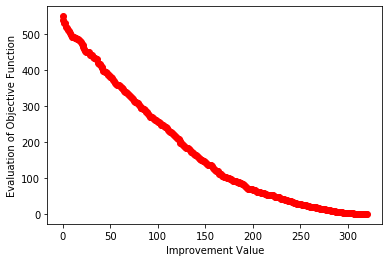

In [18]:
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot
import math


# define objective function
def objective(step):
    x1 = step[0]
    x2 = step[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj


# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    
    # evaluate initial point
    start_point_eval = objective(start_point)
    
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    
    for i in range(iterations):
        
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
            outputs.append(start_point_eval)  #Append the new values into the output list
            #print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
            print('iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
          
        difference = mia_start_eval - mia_step_eval
        t = temperature / float(i + 1)
        
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(difference / t)
        
        # check whether the new point is acceptable 
        if difference > 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
            print("SALTO")
        else:
            print("NO SALTO")
            
    return [start_point, start_point_eval, outputs]

seed(1)

# define the area of the search space
# area = asarray([[-6.0, 6.0]])
area = asarray([[-50.0, 50.0],[-50.0, 50.0]])

# initial temperature
temperature = 12

# define the total no. of iterations
iterations = 1200

# define maximum step_size
step_size = 0.1

# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)

#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()